## Section A. Model Complexity and Model Selection

### Question 2 [L-fold Cross Validation, 20 Marks]

1. Implement a L-Fold Cross Validation (CV) function for your KNN
    regressor: <br />

    __cv(train.data, train.label, numFold=10, k=3)__
    
    <br />
    which takes the training data and their labels (continuous values), the
    number of folds, and returns errors for different folds of the training data.
    
<br>

**Note:** The function cv(train.data, train.label, numFold=10, k=3) implemented in this code takes an additional parameter __k__ which represents the number of nearest neighbours. The default value of k is 3 and this function is 

In [22]:
# Load the libraries for wrangling and plotting data
library(reshape)
library(ggplot2)

In [23]:
# Load the entire dataset as train data
train <- read.csv("Task1A.csv")

# Split the data into input values and corresponding labels
train.data_cv <- train["x1"]
train.label_cv <- train[, 2]

In [24]:
# KNN function to return the k nearest elements using euclidean distance
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    # Initialize the predicted value vector
    test.label <- 0.0
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]  # returns indices of 4 nearest neighbours
                
        # Calculate the predicted labels according to the average value          
        avg <- mean(train.label[nn])
        
        # Store the average value as label
        test.label[i]<- round(avg, 2)

    }
    
    ## return the class labels as output
    return (test.label)
}

In [25]:
# Cross-validation function
cv <- function(train.data, train.label, numFold=10, k=3){
    
    # dataframe to register the error in each fold
    error_Lfold <- data.frame('Fold'=1:numFold, 'Error'=rep(0,numFold))
    
    # Create folds of size numFold
    folds <- sample(cut(seq(1, nrow(train.data)), breaks = numFold, labels = FALSE))
    
    # Perform 10 fold cross validation
    for(i in 1:numFold){
        
        # Segement the data by fold 
        testIndices <- which(folds == i,arr.ind=TRUE)
        
        # Train data is divided into train set and test set
        
        testdata <- data.frame('x'= train.data[testIndices,])
        testLabel <- train.label[testIndices]
        
        trainData <- data.frame('x'= train.data[-testIndices,])
        trainLabel <- train.label[-testIndices]  
        
        # Obtain the label using KNN
        label = knn(trainData, trainLabel, testdata, K=k)
        
        # Get the error for the fold using RMSE 
        error_Lfold[i,'Error'] <- sqrt(mean((label - testLabel)^2))
    }
    
    ## return the error of each fold as output
    return (error_Lfold)
}

In [26]:
# Verify the results for k=4
errors = cv(train.data_cv, train.label_cv, 10, k=4)

# check the dataframe output
errors

Fold,Error
1,1.5276707
2,1.0053482
3,1.6994705
4,0.6818521
5,0.9367964
6,0.9798150
7,1.3138620
8,0.7112753
9,0.4824806
10,0.7158678


2. Using the training data, run your L-Fold CV where the numFold is set to 10. Change the value of K=1,..,20 in your KNN regressor, and for each K compute the average 10 error numbers you have got. Plot the average error numbers versus 1/K for K=1,..,20 in your KNN regressor. Further, add two dashed lines around the average error indicating the average +/- standard deviation of errors.

In [27]:
# The value of K=1,..,20
K <- 20

# Dataframe to store the mean cross-validation error
cv_error_K <- data.frame('K' = 1:K)

# Calculate the mean and standard deviation of errors for each k
for (k in 1: K){
    
    # get the errors using cv
    errors <- cv(train.data_cv, train.label_cv, numFold = 10, k)
    
    # Calculate the average error
    avg_error <- mean(errors[,'Error'])
    
    # calculate the standard deviation of error   
    sd_error <- sd(errors[,'Error'])
    
    # record the results
    cv_error_K[k, 'Mean_CV_Error'] <- avg_error
    cv_error_K[k, 'Positive_SD'] <- avg_error + sd_error
    cv_error_K[k, 'Negative_SD'] <- avg_error - sd_error
}

# Verify 
cv_error_K

K,Mean_CV_Error,Positive_SD,Negative_SD
1,1.3086507,2.011246,0.60605547
2,1.1023634,1.774317,0.43041019
3,0.9659002,1.472575,0.45922501
4,1.0138908,1.485770,0.54201132
5,1.0065631,1.540262,0.47286413
6,0.9134770,1.378219,0.44873545
7,0.8140945,1.205071,0.42311745
8,0.9025944,1.282440,0.52274877
9,0.7783081,1.202750,0.35386640
10,0.8873148,1.278449,0.49618090


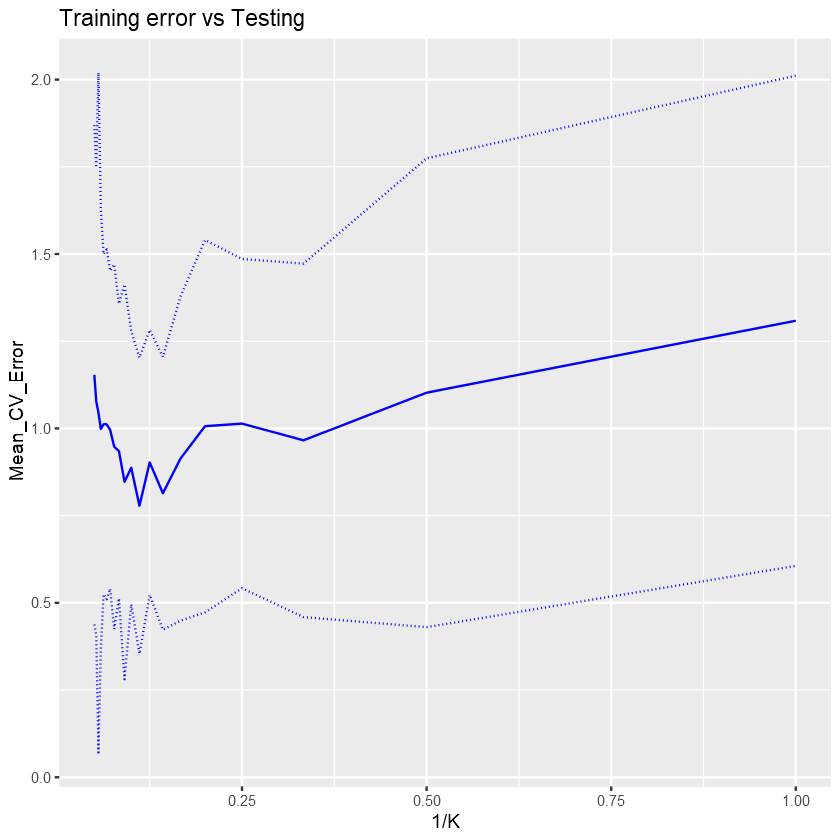

In [32]:
#  Plot the average error numbers versus 1/K for K=1,..,20
ggplot(data=cv_error_K, aes(x=1/K, y=Mean_CV_Error)) + 
        geom_line(color = "Blue") +
        geom_line(aes(y=Positive_SD),linetype="dotted", color = "Blue") + 
        geom_line(aes(y=Negative_SD),linetype="dotted", color = "Blue") +
        scale_color_discrete(guide = guide_legend(title = NULL)) +
        ggtitle("Training error vs Testing") + theme_grey()

3. Report (in your Jupyter Notebook file) the values of K that result to minimum average error and minimum standard deviation of errors based on the cross validation plot in the previous part (Part II).

**Answer:** 
* From the graph, 1/K~ 0.11 (i.e. 9<K<10) results in minimum average error and minimum standard deviation of errors based on the cross validation. 
* The minimum average error observed is 0.76 with positive and negative standard deviation as 1.49 and 0.027 respectively. 
* Thus, cross-validation verifies that the optimum value of **K is between 9 and 10**.